<a href="https://colab.research.google.com/github/Nandeesh-U/EDA_google_play_store_app_data/blob/main/ND_Team_Notebook_EDA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory = '/content/drive/MyDrive/Data_Squad_EDA/'
app_df =pd.read_csv(working_directory + 'Play Store Data.csv')
review_df =pd.read_csv(working_directory+'User Reviews.csv')

In [4]:
# Check the structure of the application csv
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Check the structure of the user review csv
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
review_df.shape

(64295, 5)

In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
64295-37427

26868

In [9]:
app_df.shape

(10841, 13)

In [10]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **ND** - In the following cells we are going to explore each variable of both the data sets and write their descriptions in the data dictionary - [here](https://docs.google.com/spreadsheets/d/1wWjc7jT9jWOZaPxMlAaXPSxA90krAy3SwkazUihiZh4/edit#gid=0)

### We try to get the range of the data if it is numeric type and get the number of unique elements if it is categorical data

In [11]:
# ND
# Check the number of unique apps available in the dataset
app_df['App'].nunique()

9660

In [12]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
app_df['Category'].nunique()

34

In [14]:
app_df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [15]:
#ND
# Checking how many instances had a rating greater than 5
app_df[app_df['Rating']>5]['Rating']

10472    19.0
Name: Rating, dtype: float64

#### Only one instance had a rating of greater than 5. Also a rating of 19 seems absurd. Since it is just one instance out of 10841, we can ignore it and drop that instance

In [16]:
#ND
# Dropping the instances whose rating is greater than 5
app_df.drop(labels=app_df[app_df['Rating']>5].index[0], inplace = True)

In [17]:
# ND
# Converting the reviews written as '3.0M' to 3000000 so that we can convert it to an integer
for index,row in app_df.iterrows():
  if 'M' in row['Reviews']:
    app_df.loc[index,'Reviews'] = float(row['Reviews'][:-1])*(10**6)

app_df['Reviews'] = app_df['Reviews'].astype(int)

In [18]:
# Checking if the data type is proper
app_df['Reviews'].dtype

dtype('int64')

In [19]:
# Since it is a numerical variable now, we can check the range of it
app_df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [20]:
# ND
# Exploring the size column
app_df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [21]:
app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
#ND
# Check how many instances have the app size expressed in MB
sum(app_df['Size'].apply(lambda x: int('M' in x)))

8829

In [23]:
#ND
# Check how many instances have the app size expressed in KB
sum(app_df['Size'].apply(lambda x: int('k' in x)))

316

In [24]:
#ND
# Check how many instances have an app size that varies with the device
sum(app_df['Size']=='Varies with device')

1695

In [25]:
8829+316+1695

10840

#### So all the instances have sizes listed as MB or kb or 'varies with device'. No missing or absurd data

In [26]:
# ND
# Exploring the 'Installs' column
# Getting the list of unique buckets for number of installations
sorted(list(app_df['Installs'].unique()))

['0',
 '0+',
 '1+',
 '1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5+',
 '5,000+',
 '5,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+']

In [27]:
app_df['Installs'].nunique()

21

In [28]:
app_df.shape

(10840, 13)

In [29]:
# Let us define a function to convert the string of 'Installs' column to integer
def str_to_int(input_str):
  '''
  This function  converts the string format of 'Install' column elements to integer format
  '''
  if '+' in input_str:
    result = int(float(input_str[:-1].replace(',','')))
  else:
    result = int(float(input_str))
  return result

In [30]:
#ND
# converting the install buckets to numeric values(adding a new column)
app_df['Numeric_Installs'] = app_df['Installs'].apply(str_to_int)

In [31]:
# ND
# Exploring the type column
app_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [32]:
# Dropping the null values in type columns
app_df = app_df[~(app_df['Type'].isnull())]

In [33]:
#ND
# Exploring the price  column
app_df['Price'].nunique()

92

In [34]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [35]:
# ND
# Cconverting the price to a float type
for index,row in app_df.iterrows():
  if '$' in row['Price']:
    app_df.loc[index,'Price'] = float(row['Price'][1:])
  else:
    app_df.loc[index,'Price'] = float(row['Price'])

app_df['Price'] = app_df['Price'].astype(float)

In [36]:
app_df['Price'].describe()

count    10839.000000
mean         1.027463
std         15.950436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [37]:
#ND
# Exploring the content rating column
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [38]:
# ND
# Exploring the genres column
app_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [39]:
app_df['Genres'].nunique()

119

In [40]:
# ND
# Exploring the last updated column
app_df['Last Updated'].head(10)

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

In [41]:
# ND
# Exploring the current version column
app_df['Current Ver'].head(10)

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
5                   1.0
6                   1.1
7              6.1.61.1
8                 2.9.2
9                   2.8
Name: Current Ver, dtype: object

In [42]:
# Looking at the Android version column
app_df['Android Ver'].head(10)

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
5      2.3 and up
6    4.0.3 and up
7      4.2 and up
8      3.0 and up
9    4.0.3 and up
Name: Android Ver, dtype: object

In [102]:
app_df.shape

(8408, 16)

### Exploring the user review dataset

In [43]:
review_df.shape

(64295, 5)

In [44]:
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [45]:
# Exploring the app column
# Finding the number of unique apps in this dataset
review_df['App'].nunique()

1074

In [46]:
# Exploring the sentiment column
review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [47]:
# Exploring the sentiment polarity column
review_df['Sentiment_Polarity'].dtype

dtype('float64')

In [48]:
review_df['Sentiment_Polarity'].describe()

count    37432.000000
mean         0.182146
std          0.351301
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [49]:
# Exploring the sentiment subjectivity column
review_df['Sentiment_Subjectivity'].dtype

dtype('float64')

In [50]:
review_df['Sentiment_Subjectivity'].describe()

count    37432.000000
mean         0.492704
std          0.259949
min          0.000000
25%          0.357143
50%          0.514286
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

## Handling missing values in the app_df dataset

In [51]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               10839 non-null  object 
 1   Category          10839 non-null  object 
 2   Rating            9366 non-null   float64
 3   Reviews           10839 non-null  int64  
 4   Size              10839 non-null  object 
 5   Installs          10839 non-null  object 
 6   Type              10839 non-null  object 
 7   Price             10839 non-null  float64
 8   Content Rating    10839 non-null  object 
 9   Genres            10839 non-null  object 
 10  Last Updated      10839 non-null  object 
 11  Current Ver       10831 non-null  object 
 12  Android Ver       10837 non-null  object 
 13  Numeric_Installs  10839 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 1.5+ MB


In [52]:
10839-9366

1473

#### Ratings column is a key performance indicator and it has 1473 missing entries

# Current version and android version have very few missing entries which can be dropped for simplicity

In [53]:
# Dropping the missing entries in current ver and android ver columns
app_df = app_df[~((app_df['Current Ver'].isnull())|(app_df['Android Ver'].isnull()))]

#**Q1:** Free apps vs Paid apps





### **a) Are free apps of poor quality?**
* We can explore this question by looking at the kind of reviews that free apps and paid apps got overall
* Another indicator of quality can be the rating

In [54]:
mean_rating_by_type = app_df.groupby(by = 'Type')[['Rating','Installs']].mean().reset_index()
mean_rating_by_type

,Type,Rating
0,Free,4.186288
1,Paid,4.266822


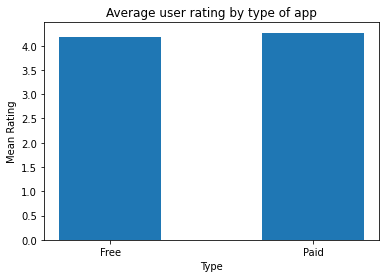

In [55]:
#mean_rating_by_type.plot(kind='bar')
plt.bar(x=mean_rating_by_type['Type'],height=mean_rating_by_type['Rating'],width=0.5)
plt.xlabel('Type')
plt.ylabel('Mean Rating')
plt.title('Average user rating by type of app')
plt.show()

* There does not seem to be any significant difference between the average ratings received by the paid apps as compared to the free apps.
* Some apps with very less number of reviews(which may be fake or biased or paid reviews) may be skewing the overall average. So let us remove the apps with less than 100 reviews and check the average rating

In [56]:
mean_rating_by_type = app_df[app_df['Reviews']>=100].groupby(by = 'Type')[['Rating','Installs']].mean().reset_index()
mean_rating_by_type

,Type,Rating
0,Free,4.210244
1,Paid,4.348615


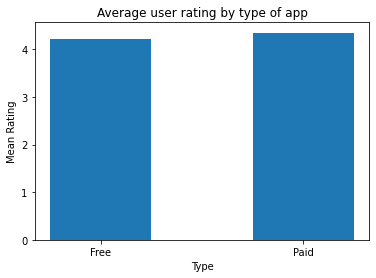

In [57]:
#mean_rating_by_type.plot(kind='bar')
plt.bar(x=mean_rating_by_type['Type'],height=mean_rating_by_type['Rating'],width=0.5)
plt.xlabel('Type')
plt.ylabel('Mean Rating')
plt.title('Average user rating by type of app')
plt.show()

* There is very little difference in terms of app rating between free and paid apps. The paid apps slightly received higher rating but not significant enough.
* But, let us check if the sentiment of the user reviews in paid apps is any better compared to the free apps. That may give us an idea whether users of paid apps are more satisfied than users of free apps
* Note that the user review data is available for only 1074 apps whereas ratings are available for 9660 apps in the app_df dataframe. So we need to merge these two dataframes and look at the sentiments

In [58]:
# Dropping the duplicate entries for the app_df dataframe
app_df.drop_duplicates(subset='App',keep='last',inplace=True)

# Creating an additional column in review_df indicating whether the review is a positive review
review_df['is_positive_review']=review_df['Sentiment_Polarity'].apply(lambda x: x>0)

# Getting the average sentiment polarity and the number of positive reviews for each app
sent_pol_df = review_df.groupby(by='App')['Sentiment_Polarity','is_positive_review'].agg({'Sentiment_Polarity':'mean','is_positive_review':'sum'}).reset_index()

# Adding a column of total number of written reviews
sent_pol_df['total reviews'] = sent_pol_df['App'].apply(lambda x: review_df[review_df['App']==x].shape[0])

# Calculating the number of positive reviews as a percentage of total number of reviews
sent_pol_df['Number of positive reviews(as % of total reviews)'] = sent_pol_df.apply(lambda x: round(100*(x['is_positive_review']/x['total reviews']),2),axis=1)
sent_pol_df.drop(['is_positive_review','total reviews'],axis=1, inplace=True)
sent_pol_df.rename(columns={'Sentiment_Polarity':'Mean_Sentiment_Polarity'},inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [59]:
# Merging the app_df and sent_pol_df dataframes
merged_app_df = pd.merge(left = app_df,
         right = sent_pol_df,
         how = 'inner',
         left_on = 'App',
         right_on = 'App')
merged_app_df = merged_app_df[['App','Category','Rating','Reviews','Installs','Type','Numeric_Installs','Mean_Sentiment_Polarity','Number of positive reviews(as % of total reviews)']]
merged_app_df.head()

,App,Category,Rating,Reviews,Installs,Type,Numeric_Installs,Mean_Sentiment_Polarity,Number of positive reviews(as % of total reviews)
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,"1,000,000+",Free,1000000,0.268483,64.0
1,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,"100,000+",Free,100000,NaN,0.0
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,"5,000,000+",Free,5000000,0.412649,10.0
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,"100,000+",Free,100000,0.283509,57.5
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,"500,000+",Free,500000,0.171836,72.5


In [60]:
mean_rating_by_type = merged_app_df[merged_app_df['Reviews']>=100].groupby(by = 'Type')[['Mean_Sentiment_Polarity','Number of positive reviews(as % of total reviews)']].mean().reset_index()
mean_rating_by_type

,Type,Mean_Sentiment_Polarity,Number of positive reviews(as % of total reviews)
0,Free,0.200450,37.218134
1,Paid,0.178237,33.676471


In [61]:
merged_app_df['Type'].value_counts()

Free    1003
Paid      17
Name: Type, dtype: int64

* Neither the Sentiment of the user review nor the average number of positive review is not in favour of any type of app, be it paid or free although free apps slightly outperform paid apps in both metrics
* But, this cannot be a conclusive evidence since there are only 17 paid apps with user reviews

## **1a) Ans:** With the given dataset we cannot conclusively prove that paid apps outperform free apps in terms of user satisfaction. Though paid apps have slightly higher ratings than free apps, free apps outperform paid apps in getting positive reviews from the user

### **b) Are free apps more popular?**
* Do free apps have more downloads than paid apps?
** Let  us see the comparision of average number of downloads of free and paid apps approximately(since we only know the bucket the app belongs to)

In [62]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9648 non-null   object 
 1   Category          9648 non-null   object 
 2   Rating            8190 non-null   float64
 3   Reviews           9648 non-null   int64  
 4   Size              9648 non-null   object 
 5   Installs          9648 non-null   object 
 6   Type              9648 non-null   object 
 7   Price             9648 non-null   float64
 8   Content Rating    9648 non-null   object 
 9   Genres            9648 non-null   object 
 10  Last Updated      9648 non-null   object 
 11  Current Ver       9648 non-null   object 
 12  Android Ver       9648 non-null   object 
 13  Numeric_Installs  9648 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [63]:
app_df.groupby(by='Type')['Numeric_Installs'].mean().reset_index().rename(columns={'Numeric_Installs':'Average_downloads'})

,Type,Average_downloads
0,Free,8.455181e+06
1,Paid,7.631527e+04


* The free apps seem to have significantly higher number of downloads on average than paid apps.
* But, a doubt occurs if a few apps are skewing the number heavily in favour of free apps. The range of number of downloads is very high. Since, apps like hotstar, amazon prime are very highly popular because of their brand value. For a new developer deciding to develop an app, he may not be aiming at such high downloads. So let us see the median to have a better picture of the average.

In [64]:
app_df.groupby(by='Type')['Numeric_Installs'].median().reset_index().rename(columns={'Numeric_Installs':'Average_downloads'})

,Type,Average_downloads
0,Free,100000.0
1,Paid,1000.0


* So the free apps seem to outperform paid apps significantly(almost by a 100 times!).
* So users seem to favour free apps compared to paid apps
* But, we have to be careful that not all free apps are absolutely free of cost. We can take the example of hotstar which is free to download but has a subscription fee. We need the subscription data to get a more accurate understanding.
* Let us further explore this question by looking at the number of apps that fall into each bucket.

In [65]:
df = app_df.groupby(by=['Installs','Numeric_Installs','Type'])['App'].count().unstack().reset_index()
num_free = sum(app_df['Type']=='Free')
num_paid = sum(app_df['Type']=='Paid')
df['Free'] = df['Free'].apply(lambda x: (x/num_free)*100)
df['Paid'] = df['Paid'].apply(lambda x: (x/num_paid)*100)
df.index = df['Installs']
df.sort_values(by= 'Numeric_Installs',inplace=True)
df.drop(['Installs','Numeric_Installs'], axis = 1,inplace=True)
df.head(10)

Type,Free,Paid
Installs,,
0+,0.044959,1.331558
1+,0.517028,2.796272
5+,0.786782,1.597870
10+,3.540519,9.187750
50+,1.910756,4.527297
100+,6.912442,12.383489
500+,3.237046,5.326232
"1,000+",8.418568,18.109188
"5,000+",4.518377,8.655126


Text(0, 0.5, 'number of apps in each category \n as a % of free/paid apps respectively')

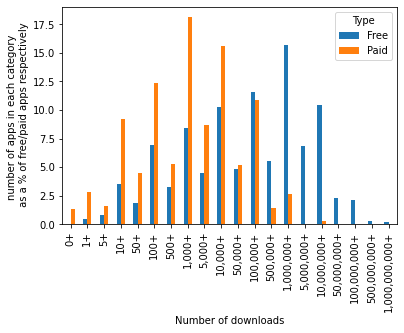

In [66]:
ax = df.plot.bar()
ax.set_xlabel('Number of downloads')
ax.set_ylabel('number of apps in each category \n as a % of free/paid apps respectively')

In [67]:
app_df[(app_df['Numeric_Installs']>1000000) & (app_df['Type']=='Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
4034,Hitman Sniper,GAME,4.6,408292,29M,"10,000,000+",Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,10000000
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,"10,000,000+",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,10000000


* We can observe the following trends from the above plot:
** Orange lines are larger than blue lines in the smaller bucket groups. It means there are more paid apps with smaller number of downloads than free apps
** There are almost no paid apps having more than 5 million downloads

* These observations reinforce our earlier understanding that free apps in general have more number of downloads than paid apps

#**1b)Ans:** Free apps do seem to have higher downloads than paid apps.

# **Q2:** What type of apps are users ready to pay for?

In [68]:
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Numeric_Installs'],
      dtype='object')

In [69]:
paid_apps = app_df[app_df['Type']=='Paid']
paid_apps.shape

(751, 14)

* So the data contains information about 751 paid apps. Let us observe the key statistics of the price variable.

In [70]:
paid_apps['Price'].describe()

count    751.000000
mean      14.107430
std       58.932854
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

* 75% of the apps cost under 5 USD
* Average cost is 14 USD. So a few apps are skewing the mean price.
* The price ranges from 0.99 USD to 400 USD
* Let us see the distribution of the price variable

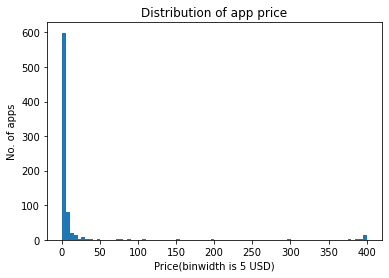

In [71]:
plt.hist(paid_apps['Price'],bins = int(400/5))
plt.xlabel('Price(binwidth is 5 USD)')
plt.ylabel('No. of apps')
plt.title('Distribution of app price')
plt.show()

* Seems that almost 700 out of 751 paid apps cost less than 10 USD. Let us exactly find out how many apps cost more than 10 USD

In [72]:
sum(paid_apps['Price']>10)

73

In [73]:
sum(paid_apps['Price']>5)

157

* Only 73 apps(10%) cost more than 10 USD
* What are the 20 most costliest apps?

In [74]:
paid_apps.sort_values(by='Price',ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,1000
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40M,0+,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,5000
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,5000
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,"1,000+",Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,1000
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,10000
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,100000
5369,I am Rich,FINANCE,4.3,180,3.8M,"5,000+",Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,5000


* Seems like finance and lifestyle apps are the costliest.
* Let us find out the categories of the apps costing more than 100 USD

In [75]:
more_than_100 = paid_apps[paid_apps['Price']>100]
more_than_100.shape

(20, 14)

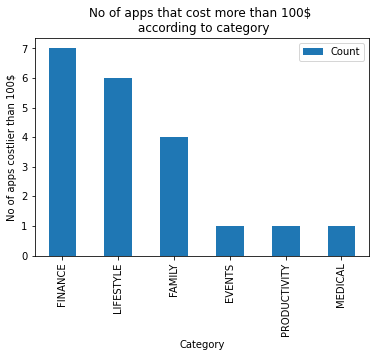

In [76]:
cat_more_100 = more_than_100['Category'].value_counts().reset_index().rename(columns= {'index':'Category','Category':'Count'})
cat_more_100.index=cat_more_100['Category']
ax = cat_more_100.plot.bar()
ax.set_ylabel('No of apps costlier than 100$')
ax.set_title('No of apps that cost more than 100$ \n according to category')
plt.show()

In [77]:
more_than_100['Numeric_Installs'].mean()

10955.05

* Apps belonging to Finance, lifestyle and family categories are the costliest. So these are the apps that users generally are ready to pay for. But, there is a caveat, the number of installs for these costly apps is relatively very low(only 10000 downloads on average)
* So, users usually prefer not to pay for downloading an app though they may subscribe to the services offered inside an app.
* Let us see what is the price distribution of 100 most downloaded paid apps

In [78]:
top_100_df = paid_apps.sort_values(by='Numeric_Installs',ascending=False)
top_100_df = top_100_df.iloc[:100]

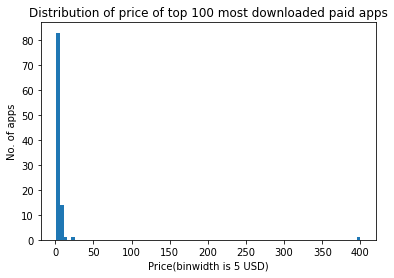

In [79]:
# Plotting the price distribution of top 100 paid apps
plt.hist(top_100_df['Price'],bins = int(400/5))
plt.xlabel('Price(binwidth is 5 USD)')
plt.ylabel('No. of apps')
plt.title('Distribution of price of top 100 most downloaded paid apps')
plt.show()

* Let us ignore the single observation which has a price of 400 USD to have a better view of the distriburion in the low price segment

In [80]:
top_100_df = top_100_df[top_100_df['Price']<50]
top_100_df.shape

(99, 14)

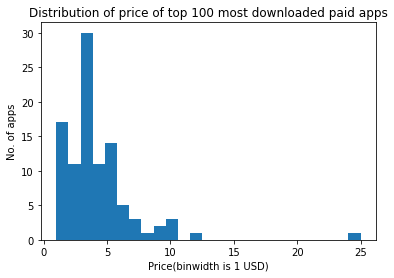

In [81]:
plt.hist(top_100_df['Price'],bins = int(25))
plt.xlabel('Price(binwidth is 1 USD)')
plt.ylabel('No. of apps')
plt.title('Distribution of price of top 100 most downloaded paid apps')
plt.show()

* Clearly, the price of 100 most downloaded paid apps is skewed towards the lower price segment.
* Lets see how many apps are under 5 dollars and how many are under 10 dollars

In [82]:
top_100_df[top_100_df['Price']<=5].shape[0]

83

In [83]:
top_100_df[(top_100_df['Price']>5) & (top_100_df['Price']<=10)].shape[0]

14

* So 83 apps among the 100 most downloaded paid apps cost less than 5 dollars. Further 97 apps cost less than 10 dollars.

# **2) Ans:** Android app users does not seem much interested in paying to download an app. Free apps have almost 100 times more downloads than paid apps on average. Among the paid apps, 85% of the apps with high downloads cost less than 5 dollars and 97% of them cost less than 10 dollars. Among the costliest apps( above 200 dollars) apps related to finance, lifestyle and family category dominate. 

# **Q3:** Does the size of the application matter? Are heavy apps not popular? How downloads are dependent on the size of the app. 

In [84]:
# Replacing the cells in the Size column listed as varies with device to np.nan so that we can ignore them for our analysis
app_df['Size'].replace('Varies with device',np.nan,inplace=True)
# Dropping the rows with null size values
app_df = app_df[~(app_df['Size'].isnull())]
app_df.shape

(8422, 14)

In [85]:
# Converting the size from string to numeric type(creating a new column)
app_df['Numeric_Size_in_MB'] = app_df['Size'].apply(lambda x: round(float(x[:-1]),2) if 'M' in x else round((float(x[:-1])/1024),2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


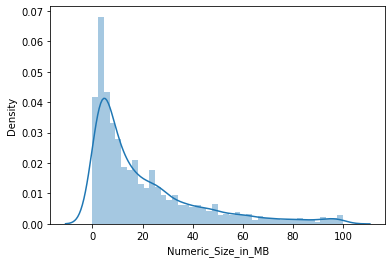

In [86]:
sns.distplot(app_df['Numeric_Size_in_MB'])

In [87]:
app_df['Numeric_Size_in_MB'].describe()

count    8422.000000
mean       20.416249
std        21.834103
min         0.010000
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Numeric_Size_in_MB, dtype: float64

* The distribution of size of the apps is clearly skewed towards the smaller apps.
* Median size is only 12 MB and 75% of apps are less than 28MB in size.
* But from this we cannot conclude that smaller apps are more popular. It just means that there are more smaller apps than heavier apps.
* To see if smaller apps are really popular, let us see the correlation between size of the app and number of downloads

Text(0.5, 1.0, 'Scatter plot of App Size vs No. of downloads')

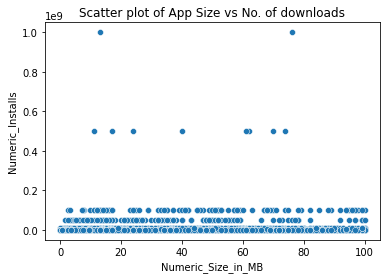

In [88]:
# Scatter plot of downloads vs the size of the app in MB
sns.scatterplot(data=app_df, x = 'Numeric_Size_in_MB', y='Numeric_Installs')
plt.title('Scatter plot of App Size vs No. of downloads')

* Since the number of installations vary in order of magnitudes, the direct scatterplot does not show a clear picture.
* Let us look at the scatterplot of logarithm of installs vs size of the app.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Scatter plot of App Size vs Logarithm of No. of downloads')

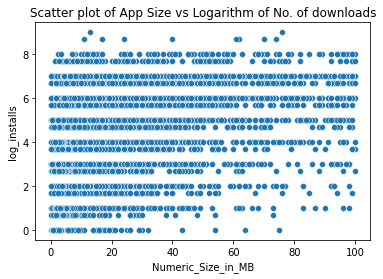

In [89]:
# Dropping the instances whose number of installs is 0 so that we can apply the logarithm
app_df=app_df[app_df['Numeric_Installs']>0]

# Applying the log10 function
app_df['log_installs'] = app_df['Numeric_Installs'].apply(lambda x: math.log10(x))

#Scatterplot of log(installs) vs size of the app
sns.scatterplot(data=app_df, x = 'Numeric_Size_in_MB', y='log_installs')
plt.title('Scatter plot of App Size vs Logarithm of No. of downloads')

* There does not seem to be any visible corelation between the size and the no. of downloads of an app
* Let us look at the correlation coefficient

In [90]:
# correlation coefficient of downloads and size
np.corrcoef(app_df['Numeric_Installs'],app_df['Numeric_Size_in_MB'])

array([[1.        , 0.13412842],
       [0.13412842, 1.        ]])

In [91]:
# correlation coefficient of log(downloads) and size
np.corrcoef(app_df['log_installs'],app_df['Numeric_Size_in_MB'])

array([[1.        , 0.29905089],
       [0.29905089, 1.        ]])

* The magnitude of correlation coefficient in both the cases is quite low. It implies that there is no significant correlation among the number of downloads and size of the app.

# **3) Ans:** With the given data, we cannot observe any correlation between the size and number of downloads of an app. It means we cannot say with the given data that large app size is a restraint for an app's popularity.

# **Q4:** Plot the correlation heat map of the dataset and see if any variables show any relation. Explore further such relation.

In [92]:
corr_df = app_df.drop('log_installs',axis=1).corr()

Text(0.5, 1.0, 'Correlation heatmap of numeric variables in the app_df dataset')

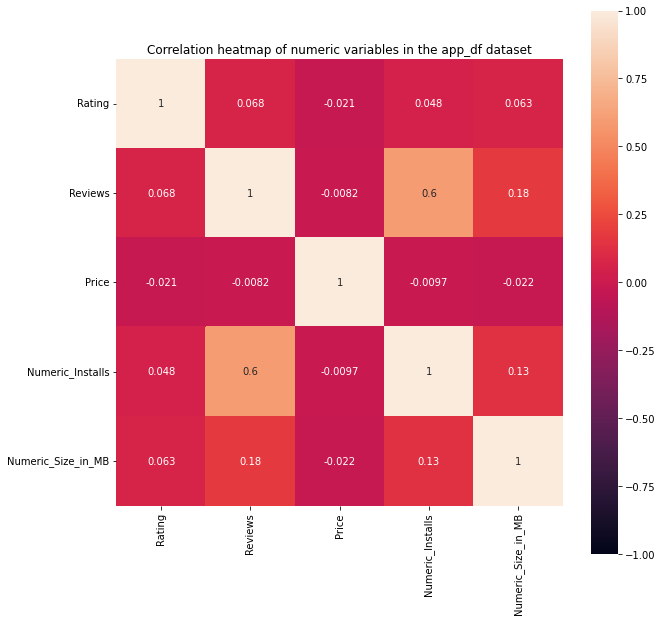

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df,vmin=-1,square=True,annot=True)
plt.title('Correlation heatmap of numeric variables in the app_df dataset')

* From the heatmap, the only significant correlation is between number of downloads and number of reviews.
* That is expected since the apps having more downloads will be used by more users and will have more reviews eventually.

In [94]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs,Numeric_Size_in_MB,log_installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000,19.0,4.00000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000,8.7,6.69897
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000,25.0,7.69897
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000,2.8,5.00000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,50000,5.6,4.69897


In [95]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [96]:
def tmp(category,df):
  cat_only_df = df[df['Category']==category]
  cat_only_df = cat_only_df.sort_values(by='Numeric_Installs',ascending=False)
  top_5_installs = sum(cat_only_df.iloc[0:5]['Numeric_Installs'])
  total_installs = sum(cat_only_df['Numeric_Installs'])
  top_5_apps = list(cat_only_df.iloc[0:5]['App'])
  return top_5_apps, round(100*(top_5_installs/total_installs),2)

In [97]:
cat_app_count = merged_app_df.groupby('Category')['App'].count().reset_index()
large_cat_list = list(cat_app_count[cat_app_count['App']>10]['Category'])
large_cat_list

['ART_AND_DESIGN',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL']

In [98]:
merged_app_df['is_large_cat'] = merged_app_df['Category'].apply(lambda x: x in large_cat_list)
merged_app_df = merged_app_df[merged_app_df['is_large_cat']]
df = merged_app_df.copy()

In [99]:
cat_wise_list = list()
for cat in large_cat_list:
  cat_wise_list.append({'Category':cat,'Top 5 app names':tmp(cat,merged_app_df)[0],'Top 5 app market share in %':tmp(cat,merged_app_df)[1]})  

In [100]:
merged_app_df[merged_app_df['Category']=='ENTERTAINMENT'].sort_values('Numeric_Installs',ascending=False)

,App,Category,Rating,Reviews,Installs,Type,Numeric_Installs,Mean_Sentiment_Polarity,Number of positive reviews(as % of total reviews),is_large_cat
163,Hotstar,ENTERTAINMENT,4.3,4885646,"100,000,000+",Free,100000000,0.038178,35.00,True
167,Amazon Prime Video,ENTERTAINMENT,4.2,411683,"50,000,000+",Free,50000000,0.461111,5.00,True
178,Crunchyroll - Everything Anime,ENTERTAINMENT,3.7,310066,"10,000,000+",Free,10000000,0.177510,87.50,True
166,BBC Media Player,ENTERTAINMENT,3.4,87384,"10,000,000+",Free,10000000,-0.028520,30.00,True
184,Fandango Movies - Times + Tickets,ENTERTAINMENT,4.6,243747,"10,000,000+",Free,10000000,0.142602,58.75,True
183,FOX,ENTERTAINMENT,3.7,197774,"10,000,000+",Free,10000000,0.213984,55.00,True
176,CBS - Full Episodes & Live TV,ENTERTAINMENT,3.8,92058,"10,000,000+",Free,10000000,NaN,0.00,True
177,Crackle - Free TV & Movies,ENTERTAINMENT,3.7,388089,"10,000,000+",Free,10000000,NaN,0.00,True
165,Girly Lock Screen Wallpaper with Quotes,ENTERTAINMENT,4.2,32458,"5,000,000+",Free,5000000,NaN,0.00,True
179,FOX NOW - On Demand & Live TV,ENTERTAINMENT,3.9,60841,"5,000,000+",Free,5000000,0.048090,48.33,True


In [101]:
pd.DataFrame(cat_wise_list)

,Category,Top 5 app names,Top 5 app market share in %
0,ART_AND_DESIGN,"[Canva: Poster, banner, card maker & graphic d...",97.68
1,BOOKS_AND_REFERENCE,"[Google Play Books, Amazon Kindle, Bible, Cool...",95.82
2,BUSINESS,"[Facebook Pages Manager, Docs To Go™ Free Offi...",77.24
3,COMMUNICATION,"[Hangouts, Gmail, Google Chrome: Fast & Secure...",83.76
4,DATING,"[Chat Rooms, Avatars, Date - Galaxy, Hot or No...",60.69
5,EDUCATION,"[Google Classroom, Coursera: Online courses, A...",68.79
6,ENTERTAINMENT,"[Hotstar, Amazon Prime Video, Crunchyroll - Ev...",76.78
7,FAMILY,"[Google Play Games, Candy Crush Saga, Cut the ...",58.49
8,FINANCE,"[Google Pay, HDFC Bank MobileBanking, Chase Mo...",67.42
9,FOOD_AND_DRINK,"[Domino's Pizza USA, Cookpad, Foursquare City ...",70.73
